In [1]:
!pip install signed_backbones

You should consider upgrading via the 'c:\users\furkan\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [2]:
import pandas as pd
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

import signed_backbones as sb

# Figure 3

Iterative fitting procedure converged at iteration 6.
2550 edges are retained.
Iterative fitting procedure converged at iteration 6.
635 edges are retained.
Iterative fitting procedure converged at iteration 6.
256 edges are retained.
Iterative fitting procedure converged at iteration 6.
126 edges are retained.


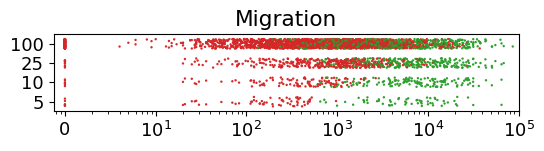

In [3]:
graph = pd.read_csv('usmigration2018.csv', header=None)

plt.style.use('default') 
font = {'size'   : 13}
plt.rc('font', **font)
plt.figure(figsize=(6, 1))
# plt.box(False)

plt.title('Migration')
# plt.ylabel('Retained Links')
# plt.xlabel('$W_{ij}$')

plt.xscale('log')
plt.xlim((0.75, 100000))
plt.ylim((0.5, 4.5))
plt.xticks(ticks =[1, 10**1, 10**2, 10**3, 10**4, 10**5],  labels = ['0', '$10^1$', '$10^2$', '$10^3$', '$10^4$','$10^5$'])
plt.yticks(ticks =[1, 2, 3, 4],  labels = ['5','10', '25', '100'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()

hyperparameters = [
                  [(0,0)    , (0,0)      ], 
                  [(-33, 33), (-0.33, 0.33)],
                  [(-40, 40), (-0.57, 0.57)],
                  [(-40, 40), (-0.72, 0.72)],
                  ]

i = 4
for p in hyperparameters:
  backbone = sb.extract(graph, significance_threshold = p[0], vigor_threshold = p[1], return_weights=True)
  a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(graph), left_on = [0,1], right_on = [0, 1], how = 'left').fillna(0)
  plt.scatter(a.loc[:,'2_y'] +1, np.full(a.loc[:,'2_y'].shape, i) + np.random.rand(a.loc[:,'2_y'].shape[0])/2 - 0.25, c=np.sign(a['2_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 2, marker = '.')
  i = i - 1





Iterative fitting procedure converged at iteration 3.
650 edges are retained.
Iterative fitting procedure converged at iteration 3.
165 edges are retained.
Iterative fitting procedure converged at iteration 3.
65 edges are retained.
Iterative fitting procedure converged at iteration 3.
34 edges are retained.


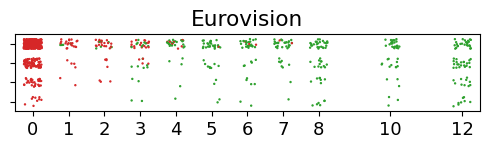

In [4]:
graph = pd.read_csv('eurovision2003.csv', header=None)

plt.style.use('default') 
font = {'size'   : 13}
plt.rc('font', **font)
plt.figure(figsize=(6, 1))
# plt.box(False)

plt.title('Eurovision')
# plt.ylabel('Retained Links')
# plt.xlabel('$W_{ij}$')

# plt.xscale('log')
plt.xlim((-0.5, 12.5))
plt.ylim((0.5, 4.5))
plt.xticks(ticks =[0, 1, 2, 3, 4, 5, 6, 7, 8, 10, 12])#,  labels = ['0', '$10^1$', '$10^2$', '$10^3$', '$10^4$','$10^5$'])
plt.yticks(ticks =[1, 2, 3, 4],  labels = [])#'5%','10%', '25%', '100%'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()

hyperparameters = [
                  [(0,0)    , (0,0)      ], 
                  [(-1.5, 2.25), (-0, 0)],
                  [(-2, 4.5), (-0, 0)],
                  [(-2.5, 5), (-0., 0.)],
                  ]

ranforviz = (np.random.rand(1000) - 0.5)/2
i = 4
for p in hyperparameters:
  backbone = sb.extract(graph, significance_threshold = p[0], vigor_threshold = p[1], return_weights=True)
  a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(graph), left_on = [0,1], right_on = [0, 1], how = 'left').fillna(0)
  plt.scatter(a.loc[:,'2_y'] + ranforviz[:len(a)], np.full(a.loc[:,'2_y'].shape, i) + np.random.rand(a.loc[:,'2_y'].shape[0])/2 - 0.25, c=np.sign(a['2_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 2, marker = '.')
  i = i - 1

Iterative fitting procedure converged at iteration 3.
6328 edges are retained.
Iterative fitting procedure converged at iteration 3.
1542 edges are retained.
Iterative fitting procedure converged at iteration 3.
620 edges are retained.
Iterative fitting procedure converged at iteration 3.
324 edges are retained.


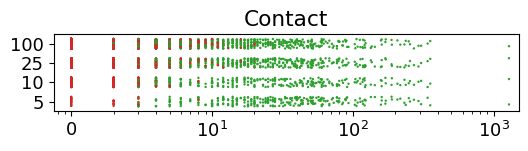

In [5]:
graph = pd.read_csv('hypertext2009.csv', header=None)
edges = graph.copy()
edges.loc[:,'pair'] = edges.iloc[:,[0,1]].apply(frozenset, axis=1)
edges = edges.loc[:, ['pair', 2]]
edges.columns = ['pair', 'weight']

plt.style.use('default') 
font = {'size'   : 13}
plt.rc('font', **font)
plt.figure(figsize=(6, 1))
# plt.box(False)

plt.title('Contact')
# plt.ylabel('Retained Links')
# plt.xlabel('$W_{ij}$')

plt.xscale('log')
plt.xlim((0.75, 1500))
plt.ylim((0.5, 4.5))
plt.xticks(ticks =[1, 10**1, 10**2, 10**3],  labels = ['0', '$10^1$', '$10^2$', '$10^3$'])
plt.yticks(ticks =[1, 2, 3, 4],  labels = ['5','10', '25', '100'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()

hyperparameters = [
                  [(0,0)    , (0,0)      ], 
                  [(-2, 2), (-0, 0)],
                  [(-3, 3), (-0.66, 0.66)],
                  [(-5, 5), (-0.55, 0.55)],
                  ]

i = 4
for p in hyperparameters:
  backbone = pd.DataFrame(sb.extract(graph, significance_threshold = p[0], vigor_threshold = p[1], return_weights=True, directed = False))
  backbone.loc[:,'pair'] = backbone.iloc[:,[0,1]].apply(frozenset, axis=1)
  backbone = backbone.loc[:, ['pair', 2]]
  backbone.columns = ['pair', 'weight']
  a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = 'pair', right_on = 'pair', how = 'left').fillna(0)
  plt.scatter(a.loc[:,'weight_y'] + 1, np.full(a.loc[:,'weight_y'].shape, i) + np.random.rand(a.loc[:,'weight_y'].shape[0])/2 - 0.25 , c=np.sign(a['weight_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 2, marker = '.')
  i = i - 1

Iterative fitting procedure converged at iteration 3.
1891 edges are retained.
Iterative fitting procedure converged at iteration 3.
481 edges are retained.
Iterative fitting procedure converged at iteration 3.
187 edges are retained.
Iterative fitting procedure converged at iteration 3.
98 edges are retained.


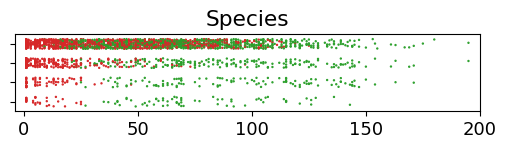

In [6]:
graph = pd.read_csv('species.csv', header=None)
edges = graph.copy()
edges.loc[:,'pair'] = edges.iloc[:,[0,1]].apply(frozenset, axis=1)
edges = edges.loc[:, ['pair', 2]]
edges.columns = ['pair', 'weight']

plt.style.use('default') 
font = {'size'   : 13}
plt.rc('font', **font)
plt.figure(figsize=(6, 1))
# plt.box(False)

plt.title('Species')
# plt.ylabel('Retained Links')
# plt.xlabel('$W_{ij}$')

# plt.xscale('log')
plt.xlim((-4, 200))
plt.ylim((0.5, 4.5))
# plt.xticks(ticks =[1, 10**1, 10**2, 10**3, 10**4, 10**5],  labels = ['0', '$10^1$', '$10^2$', '$10^3$', '$10^4$','$10^5$'])
plt.yticks(ticks =[1, 2, 3, 4],  labels = [])#'5%','10%', '25%', '100%'], rotation= 0)
# plt.tick_params(axis='y', left=False, grid_alpha = 0.25)
# plt.tick_params(axis='x', bottom=False,  grid_alpha = 0.25)
# plt.minorticks_off()

hyperparameters = [
                  [(0,0)    , (0,0)      ], 
                  [(-3.5, 3.5), (-0.15, 0.15)],
                  [(-5, 5), (-0.2, 0.2)],
                  [(-5.5, 5.5), (-0.33, 0.33)],
                  ]

i = 4
for p in hyperparameters:
  backbone = pd.DataFrame(sb.extract(graph, significance_threshold = p[0], vigor_threshold = p[1], return_weights=True, directed = False))
  backbone.loc[:,'pair'] = backbone.iloc[:,[0,1]].apply(frozenset, axis=1)
  backbone = backbone.loc[:, ['pair', 2]]
  backbone.columns = ['pair', 'weight']
  a = pd.merge(pd.DataFrame(backbone), pd.DataFrame(edges), left_on = 'pair', right_on = 'pair', how = 'left').fillna(0)
  plt.scatter(a.loc[:,'weight_y'] + 1, np.full(a.loc[:,'weight_y'].shape, i) + np.random.rand(a.loc[:,'weight_y'].shape[0])/2 - 0.25 , c=np.sign(a['weight_x']).replace(-1, 'tab:red').replace(1, 'tab:green'), alpha = 1, s = 2, marker = '.')
  i = i - 1

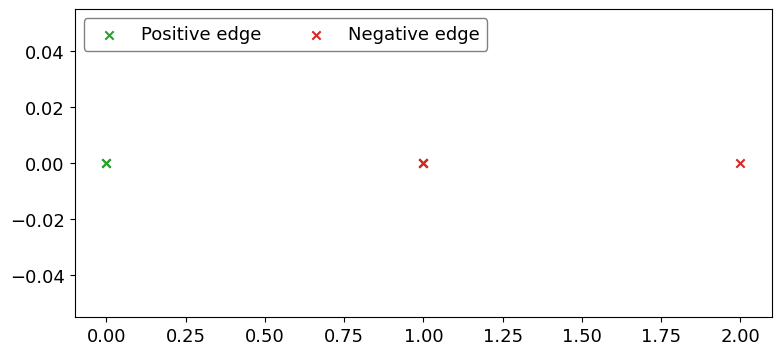

In [7]:
plt.figure(figsize=(9, 4))
plt.scatter([1, 0, 0], [0, 0, 0], label='Positive edge', color = 'tab:green', marker = 'x')
plt.scatter([1, 2, 1], [0, 0, 0],  label='Negative edge', color = 'tab:red', marker = 'x')
plt.legend(loc = 2, ncol = 2, framealpha = 1, edgecolor = 'gray', fancybox = True)